# Tutorial YOLOv5

***
**Por: Jorge Ansótegui Gandul** 
***
Para este tutorial se ha usado el modelo YOLOv5 siguiente: https://github.com/ultralytics/yolov5
Este modelo se ha solidificado en la comunidad como uno de los más fiables, esto se puede ver en el número de usuarios que lo han usado en sus implementaciones (Forks).

En la página de GitHub, podemos encontrar la documentación a la que se hará referencia en este tutorial. 

***
**`Instalar e importar dependencias`**
***
1. Primero instalamos pyTorch, con la siguiente linea la cual la hemos sacado de: https://pytorch.org/get-started/locally/

In [1]:
import torch
torch.cuda.is_available()

False

In [2]:
!pip3 install torch torchvision torchaudio
# Es posible que la mayoría de dependencias ya esten instaladas ^^

2. Ahora clonamos  el repositorio del modelo YOLOv5 en nuestro entorno de trabajo.

In [3]:
!git clone https://github.com/ultralytics/yolov5
# Se deberia haber creado una carpeta en nuestro area de trabajo
# Si ya lo teniamos saldra el siguiente error =>fatal: destination path 'yolov5' already exists and is not an empty directory.

fatal: destination path 'yolov5' already exists and is not an empty directory.


3. Dentro de la nueva carpeta tenemos un archivo "requirements.txt" en el cual se indican las siguientes dependencias que tenemos que instalar.

In [4]:
!cd yolov5 & pip install -r requirements.txt

4. Ahora que nos hemos asegurado de installar todas las dependencias necesarias vamos a importarlas a nuestro notebook.

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2 #Para abrir webcam

# Esta línea de código establece una variable de entorno llamada KMP_DUPLICATE_LIB_OK con el valor "True", lo que significa que permite la carga de bibliotecas duplicadas en el entorno de Python. Esto es útil para algunas bibliotecas de Machine Learning que usan OpenMP para acelerar el cómputo.
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

***
**`Cargamos el Modelo y lo mostramos`**
***

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
# Esto lo que esta haciendo es cargar el modelo prentrenado de YOLOv5 que esta en el repositorio de GitHub
# Como se puede ver en la documentación existen varios modelos de YOLOv5: YOLOv5n, YOLOv5s, YOLOv5m, etc...
# En este tutorial se va a utilizar el básico (o versión pequeña/small): YOLOv5s

Using cache found in C:\Users\shirk/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-21 Python-3.9.13 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model
# Aquí podemos ver echarle un ojo a la arquitectura del modelo, pero eso no es lo que nos interesa ahora mismo 

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

***
**`Realizando nuestra primera detección`**
***

In [8]:
# Cargamos unas imagenes cualquiera

img = 'https://e00-elmundo.uecdn.es/assets/multimedia/imagenes/2019/01/19/15479102129540.jpg'

img2 = 'https://dnm.nflximg.net/api/v6/BvVbc2Wxr2w6QuoANoSpJKEIWjQ/AAAAQci3oiMNsUAXjqrcN8DW3C2waX6qKHm3mP7TEDQWMKFdm1gCuBJWoVmYqBtwr5m8uLtUOupGLmonlTnAEGUtjAr_0Z0hMni_fYh66Kan5Qql0JYISbWIu2MEZfzSFmTNJb-iT5aEYk7OBYZeJJEUlnf7j-c.jpg?r=276'

img3 = 'https://www.autofacil.es/wp-content/uploads/2021/05/barcelonatrafico-copia.jpg'

Para este tutorial se estan usando los pesos de un dataset muy conocido y usado llamado COCO. El cual tiene diferentes clases las cuales es capaz de detectar.

Esas clases se pueden ver aquí: https://gist.github.com/AruniRC/7b3dadd004da04c80198557db5da4bda

In [9]:
results = model(img)
results.print()

results2 = model(img2)
results2.print()

results3 = model(img3)
results3.print()

image 1/1: 482x660 3 persons, 2 ties
Speed: 121.7ms pre-process, 250.7ms inference, 16.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 750x1422 13 persons
Speed: 467.1ms pre-process, 177.2ms inference, 2.1ms NMS per image at shape (1, 3, 352, 640)
image 1/1: 675x1200 4 persons, 16 cars, 6 buss, 4 trucks, 4 traffic lights
Speed: 119.7ms pre-process, 196.5ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


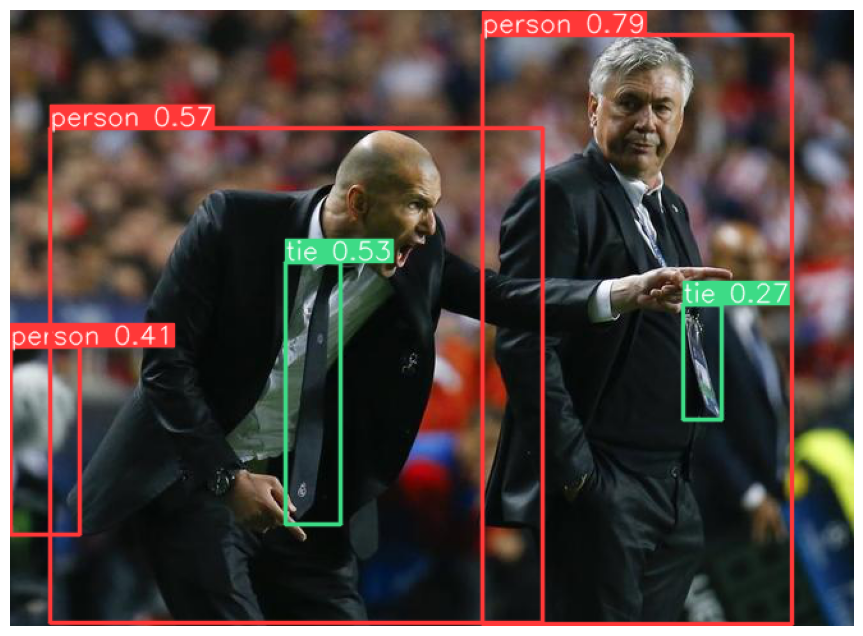

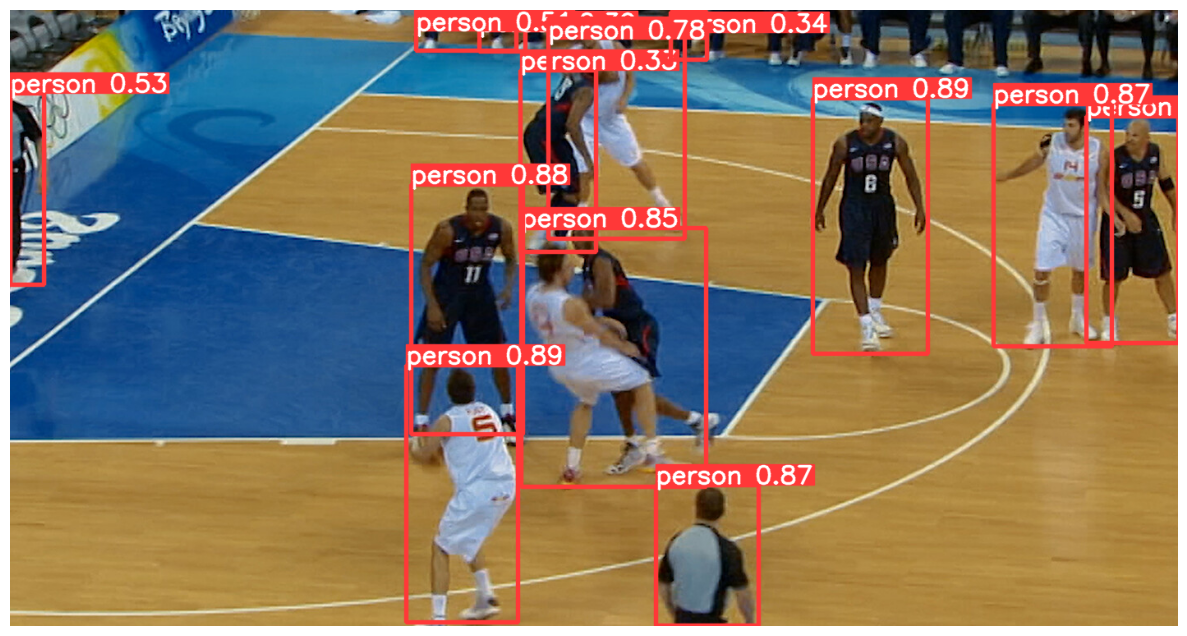

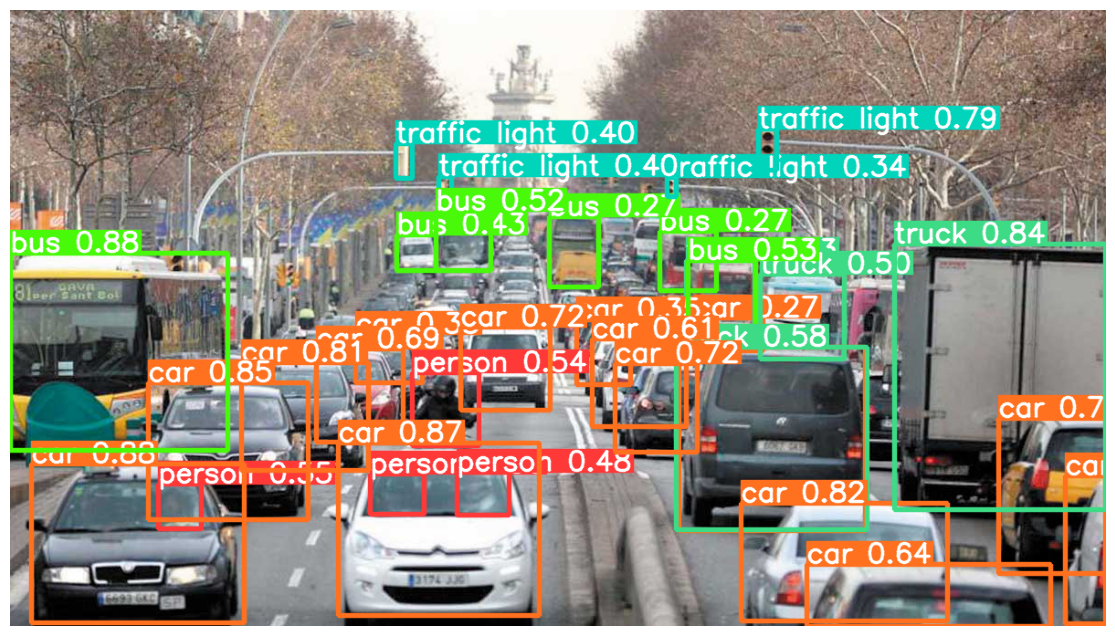

In [10]:
%matplotlib inline
figura = plt.figure(1, figsize=(16,8))
ejes = figura.add_subplot(111)
ejes.imshow(np.squeeze(results.render()))
plt.axis('off')
plt.show()

figura2 = plt.figure(2, figsize=(16,8))
ejes2 = figura2.add_subplot(111)
ejes2.imshow(np.squeeze(results2.render()))
plt.axis('off')
plt.show()

figura3 = plt.figure(3, figsize=(16,8))
ejes3 = figura3.add_subplot(111)
ejes3.imshow(np.squeeze(results3.render()))
plt.axis('off')
plt.show()

In [11]:
results.xyxy # Esto nos da todas las coordenadas para este modelo en concreto

[tensor([[3.69767e+02, 1.97956e+01, 6.11687e+02, 4.80802e+02, 7.91200e-01, 0.00000e+00],
         [3.11414e+01, 9.29225e+01, 4.16837e+02, 4.79947e+02, 5.67791e-01, 0.00000e+00],
         [2.15333e+02, 1.97155e+02, 2.58990e+02, 4.02343e+02, 5.34078e-01, 2.70000e+01],
         [1.51723e-01, 2.63822e+02, 5.40944e+01, 4.10395e+02, 4.08224e-01, 0.00000e+00],
         [5.26840e+02, 2.30308e+02, 5.56303e+02, 3.20074e+02, 2.71264e-01, 2.70000e+01]])]

In [12]:
results.render() # Esto nos devuelve la imagen con las detecciones encima

[array([[[ 94,  89,  85],
         [ 95,  90,  87],
         [ 94,  89,  86],
         ...,
         [ 14,  15,  17],
         [ 13,  14,  16],
         [ 12,  13,  15]],
 
        [[ 94,  89,  85],
         [ 94,  89,  86],
         [ 92,  87,  84],
         ...,
         [ 14,  15,  17],
         [ 13,  14,  16],
         [ 12,  13,  15]],
 
        [[ 93,  90,  85],
         [ 92,  89,  84],
         [ 89,  85,  82],
         ...,
         [ 14,  15,  17],
         [ 13,  14,  16],
         [ 12,  13,  15]],
 
        ...,
 
        [[ 37,  47,  59],
         [ 37,  47,  59],
         [ 37,  47,  59],
         ...,
         [ 58,  83, 105],
         [ 50,  75,  97],
         [ 44,  69,  91]],
 
        [[ 33,  48,  55],
         [ 29,  44,  51],
         [ 29,  44,  51],
         ...,
         [ 67,  89, 112],
         [ 59,  81, 104],
         [ 53,  75,  98]],
 
        [[ 33,  48,  55],
         [ 29,  44,  51],
         [ 29,  44,  51],
         ...,
         [ 67,  89, 112],
  

In [13]:
np.array(results.render()).shape # Esto nos devuelve la forma de la imagen con las detecciones encima y vemos que esta encapsulado en otra matriz por encima: (1, 482, 660, 3), por eso antes para mostrarlo usabamos el método squeeze para que nos quede solo (482, 660, 3).

(1, 482, 660, 3)

***
**`Detección en tiempo real y en video`**
***
Ahora vamos a usar un bucle con openCV, bastante común. 
Con el que vamos a poder acceder a nuestra webcam.

Vamos a poder realizar un bucle que capture el feed de nuestra webcam.

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened(): # Si nuestra webcam esta activa
    ret, frame = cap.read() # En frame se encuentra la imagen
    
    frame = cv2.resize(frame, None, None, fx=2, fy=2)

    results = model(frame) # Hacemos la detección 
    
    cv2.imshow('Webcam', np.squeeze(results.render()))
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'): # Para parar se le da a la 'q'
        break
cap.release()
cv2.destroyAllWindows()

Ahora vamos a ver como podríamos realizar la detección sobre un video.

Es básicamente igual pero cambiando el cv2.VideoCapture(0), a la ruta del video.

In [15]:
cap = cv2.VideoCapture('Imagenes\POV OFFICE LIFE 720p.mp4')
while cap.isOpened(): # Si nuestra webcam esta activa
    ret, frame = cap.read() # En frame se encuentra la imagen

    frame = cv2.resize(frame, None, None, fx=1, fy=1)
    
    results = model(frame) # Hacemos la detección 
    
    cv2.imshow('Video', np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # Para parar se le da a la 'q'
        break
cap.release()
cv2.destroyAllWindows()

***
**`Entrenar un modelo desde cero`**
***

In [16]:
import uuid   # Unique identifier
import time

In [17]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images Es necesario el crear esta ruta, sino las imagenes no se crearán
labels = ['nariz']
number_imgs = 5

***
Se sacan las fotos con el siguiente código.

Es necesario el crear esta ruta, sino las imagenes no se crearán, osea crear las carpetas data/images y data/labels
***

In [18]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.0d5b64e9-c77c-11ed-a06c-dc2148f8523b.jpg


In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)  

data\images\awake.125e45b3-c77c-11ed-914a-dc2148f8523b.jpg
data\images\awake.125e45b4-c77c-11ed-9487-dc2148f8523b.jpg
data\images\awake.125e45b5-c77c-11ed-b904-dc2148f8523b.jpg
data\images\awake.125e45b6-c77c-11ed-9556-dc2148f8523b.jpg
data\images\awake.125e45b7-c77c-11ed-9569-dc2148f8523b.jpg
data\images\drowsy.125e45b8-c77c-11ed-8377-dc2148f8523b.jpg
data\images\drowsy.125e45b9-c77c-11ed-841c-dc2148f8523b.jpg
data\images\drowsy.125e45ba-c77c-11ed-a540-dc2148f8523b.jpg
data\images\drowsy.125e45bb-c77c-11ed-8fac-dc2148f8523b.jpg
data\images\drowsy.125e45bc-c77c-11ed-aa11-dc2148f8523b.jpg


Ahora vamos a ver como se etiquetan las imagenes, para eso clonamos el siguiente repositorio:

https://github.com/tzutalin/labelImg

In [ ]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.9 which is incompatible.



  Using cached PyQt5-5.15.9-cp37-abi3-win_amd64.whl (6.8 MB)


Ahora podemos abrir un terminal en la carpeta del repositorio que acabamos de clonar y lanzar el programa de labelImg.py

> python labelImg.py

A mi no me ha funcionado así que lo lanzo en la siguiente celda.
 
# NOTA

Cosas a tener en cuenta:

1. Que el formato de las etiquetas sea YOLO

2. Cambiar los directorios de entrada de imagenes y salida de etiquetas

3. Cuando se acabe el etiquetado se puede ir al archivo de clases generado en la carpeta de labels y borrar todas las categorias  que no vamos a usar

In [3]:
%%capture
%run -i "labelImg\labelImg.py"


Ahora tenemos que crear el archivo dataset.yaml, que contiene las categorias de nuestros pesos y las rutas de nuestras imagenes de entrenamiento, test y validación.

In [ ]:
# %%writefile /yolov5/deteccion_narices.yaml

# path: /data 
# train: images
# val: images
# test:

# # Clases
# nc: 16 # Número de clases que tenemos, para mirar estas clases podemos irnos a archivo de classes.txt creado despues de etiquetar nuestras dotos en la carpeta de labels

# # Nombre de las clases
# names: ['dog','person','cat','tv','car','meatballs','marinara sauce','tomato soup','chicken noodle soup','french onion soup','chicken breast','ribs','pulled pork','hamburger','cavity','Nariz']


f= open("yolov5/data/deteccion_narices.yaml","w+")

f.write("path: ../data \ntrain: images \nval: images \n\nnc: 16 \n\nnames: ['dog','person','cat','tv','car','meatballs','marinara sauce','tomato soup','chicken noodle soup','french onion soup','chicken breast','ribs','pulled pork','hamburger','cavity','Nariz']")

f.close()

***
Con la siguiente celda empezamos el entrenamiento.

Me gustaría añadir una barra de progreso, cuando descubra como lo añadiré.
***

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data deteccion_narices.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=deteccion_narices.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-120-g3e55763 Python-3.9.13 torch-2.0.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, tran

***
**`Cargamos nuestro modelo`**
***

In [12]:
modelo_nariz = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp10/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\shirk/.cache\torch\hub\master.zip
YOLOv5  2023-3-24 Python-3.9.13 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


Subimos una imagen de test.

In [ ]:
# img = 'https://fotofigaredo.files.wordpress.com/2015/01/foto-carnet.jpg'
img = 'data/images/awake.e2bd5d68-c77b-11ed-85f7-dc2148f8523b.jpg'

In [ ]:
results = modelo_nariz(img)

In [ ]:
results.print()

image 1/1: 480x640 1 Nariz
Speed: 13.8ms pre-process, 221.1ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


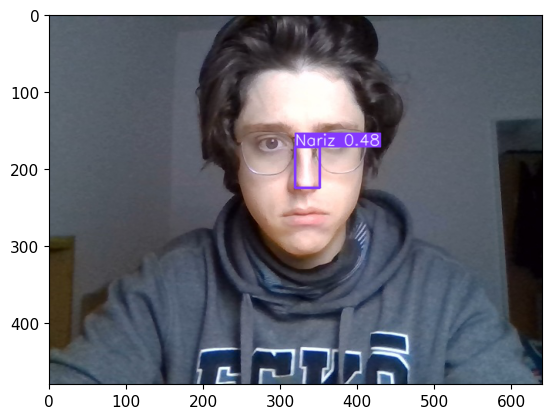

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

Podemos ver como funciona el modelo en tiempo real.

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened(): # Si nuestra webcam esta activa
    ret, frame = cap.read() # En frame se encuentra la imagen
    
    frame = cv2.resize(frame, None, None, fx=2, fy=2)

    results = modelo_nariz(frame) # Hacemos la detección 
    
    cv2.imshow('Webcam', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'): # Para parar se le da a la 'q'
        break
cap.release()
cv2.destroyAllWindows()